In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, nfilenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current sessio


In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
test_PassangerId = test_df["PassengerId"]

In [3]:
train_df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [4]:
train_df.columns


Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [5]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [6]:
train_df.describe()


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [7]:
train_df["Transported"] = [1 if i == 1 else 0 for i in train_df["Transported"]]
train_df["VIP"] = [1 if i == 1 else 0 for i in train_df["VIP"]]
train_df["CryoSleep"] = [1 if i == 1 else 0 for i in train_df["VIP"]]

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8693 non-null   int64  
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8693 non-null   int64  
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   int64  
dtypes: float64(6), int64(3), object(5)
memory usage: 950.9+ KB


In [9]:
train_df.head()


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,Europa,1,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1


In [10]:
def bar_plot(variable):
    """
        input: variable
        output: bar plot & value count
    """
    # get feature
    var = train_df[variable]
    # count number of categorical variable(value)
    varValue = var.value_counts()

    #visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}" .format(variable,varValue))

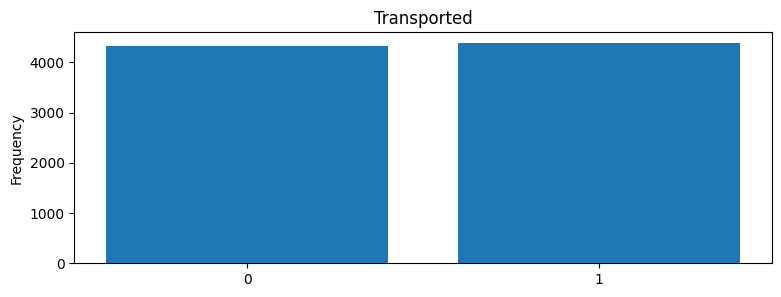

Transported: 
 Transported
1    4378
0    4315
Name: count, dtype: int64


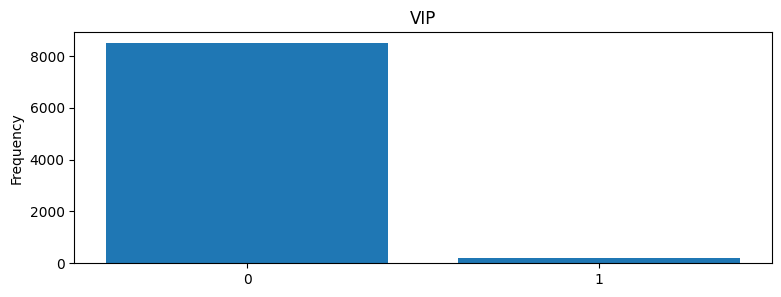

VIP: 
 VIP
0    8494
1     199
Name: count, dtype: int64


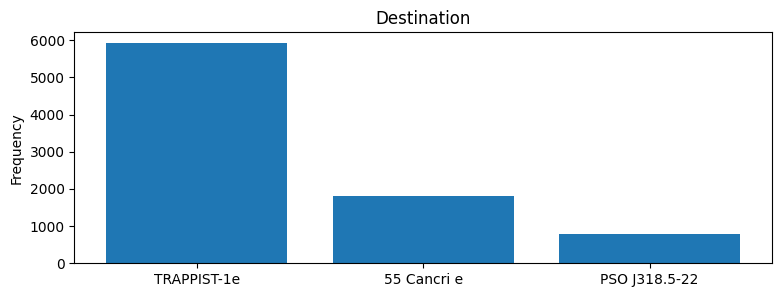

Destination: 
 Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64


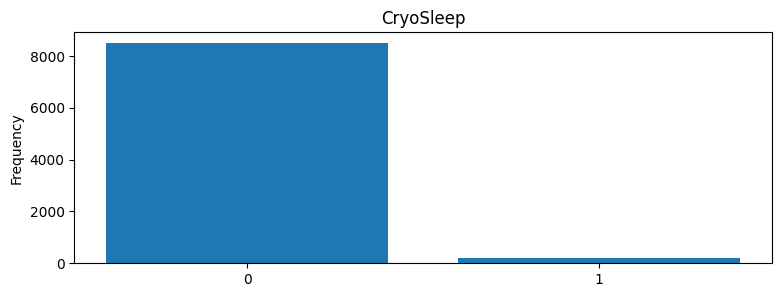

CryoSleep: 
 CryoSleep
0    8494
1     199
Name: count, dtype: int64


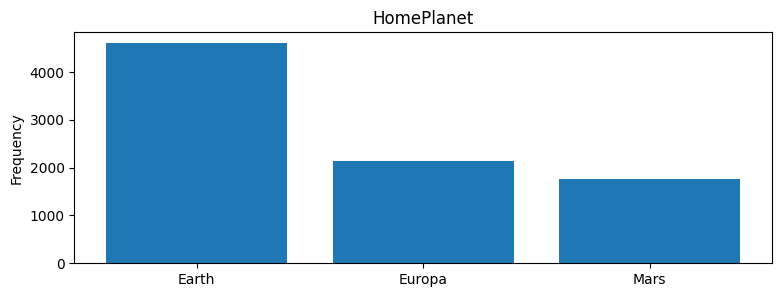

HomePlanet: 
 HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64


In [11]:
category1 = ["Transported","VIP", "Destination", "CryoSleep", "HomePlanet"]
for c in category1:
    bar_plot(c)

In [12]:
category2 = ["Cabin", "Name"]
for c in category2:
    print("{} \n".format(train_df[c].value_counts()))

Cabin
G/734/S     8
F/1194/P    7
B/201/P     7
G/981/S     7
G/109/P     7
           ..
E/56/P      1
A/98/P      1
G/1499/S    1
G/1500/S    1
D/252/P     1
Name: count, Length: 6560, dtype: int64 

Name
Anton Woody          2
Apix Wala            2
Glenna Valezaley     2
Sharie Gallenry      2
Juane Popelazquez    2
                    ..
Kenny Mallerez       1
Darley Franton       1
Ties Apple           1
Annah Gilleyons      1
Solam Susent         1
Name: count, Length: 8473, dtype: int64 



In [13]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(train_df[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

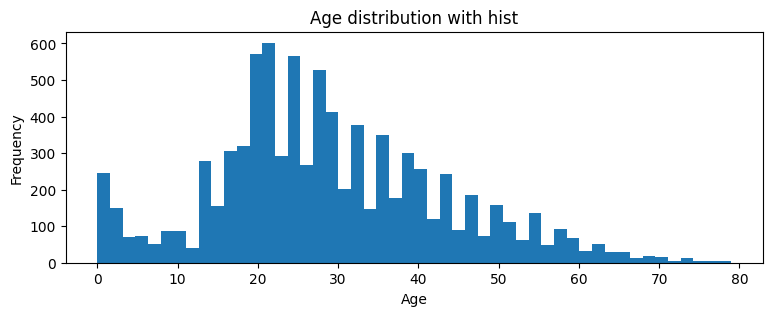

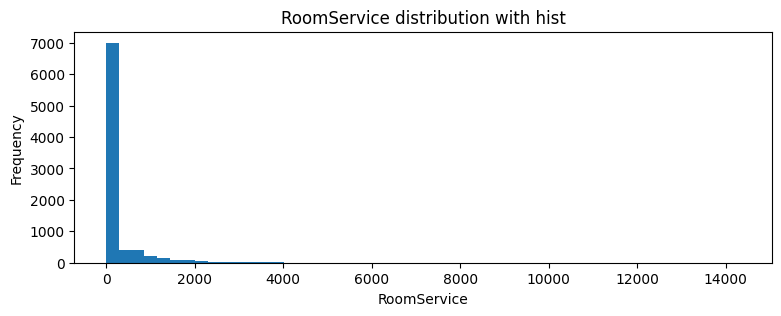

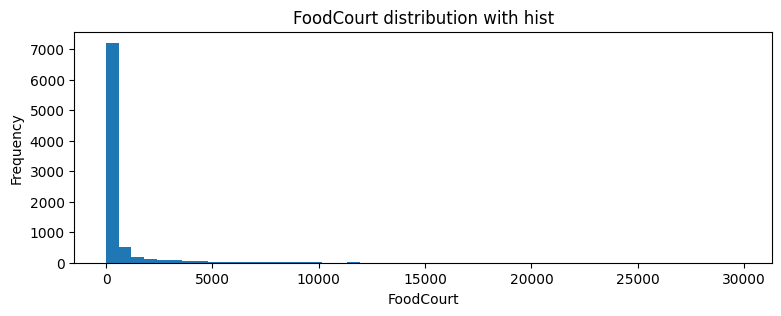

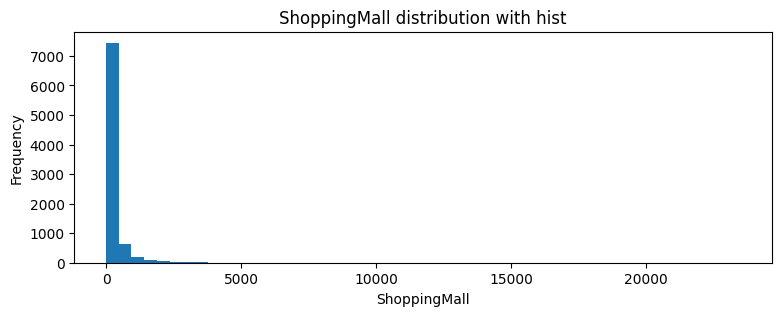

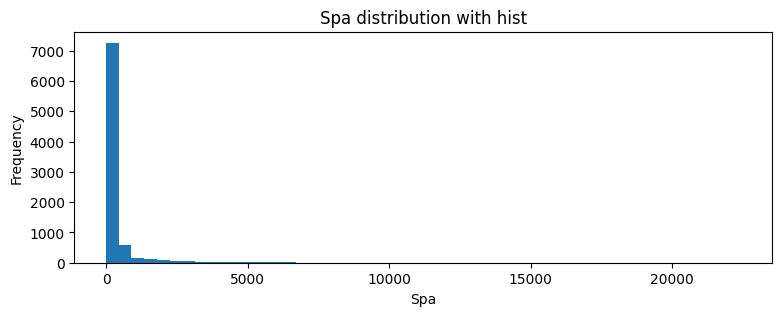

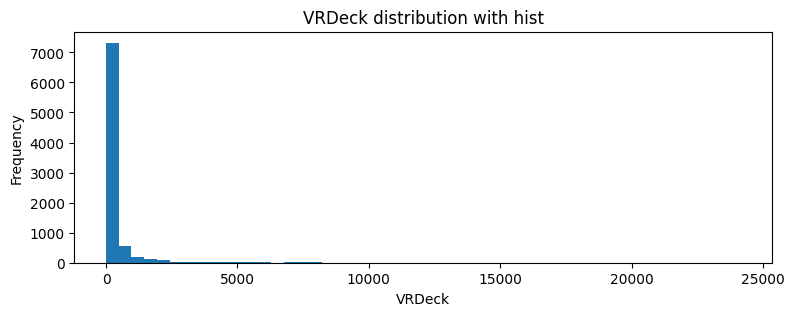

In [14]:
numericVar = ["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
for c in numericVar:
    plot_hist(c)


In [15]:
# VIP - Transported
train_df[["VIP", "Transported"]].groupby(["VIP"], as_index = False).mean().sort_values(by = "Transported", ascending = False)

,VIP,Transported
0,0,0.506475
1,1,0.381910


In [16]:
# Destination - Transported
train_df[["Destination", "Transported"]].groupby(["Destination"], as_index = False).mean().sort_values(by = "Transported", ascending = False)

,Destination,Transported
0,55 Cancri e,0.610000
1,PSO J318.5-22,0.503769
2,TRAPPIST-1e,0.471175


In [17]:
# CryoSleep - Transported
train_df[["CryoSleep", "Transported"]].groupby(["CryoSleep"], as_index = False).mean().sort_values(by = "Transported", ascending = False)

,CryoSleep,Transported
0,0,0.506475
1,1,0.381910


In [18]:
# HomePlanet - Transported
train_df[["HomePlanet", "Transported"]].groupby(["HomePlanet"], as_index = False).mean().sort_values(by = "Transported", ascending = False)

,HomePlanet,Transported
1,Europa,0.658846
2,Mars,0.523024
0,Earth,0.423946


In [19]:
def detect_outliers(df,features):
    outlier_indices = []

    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # Dedect outlier and their indices
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        #Store indices
        outlier_indices.extend(outlier_list_col)
   
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v>= 1)

    return multiple_outliers

In [20]:
train_df.loc[detect_outliers(train_df, ["Age", "RoomService", "FoodCourt", "Spa", "ShoppingMall","VRDeck"])]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported


In [21]:
train_df.columns[train_df.isnull().any()]

Index(['HomePlanet', 'Cabin', 'Destination', 'Age', 'RoomService', 'FoodCourt',
       'ShoppingMall', 'Spa', 'VRDeck', 'Name'],
      dtype='object')

In [22]:
train_df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep         0
Cabin           199
Destination     182
Age             179
VIP               0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [23]:
#CryoSleep
train_df[train_df["CryoSleep"].isnull()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported


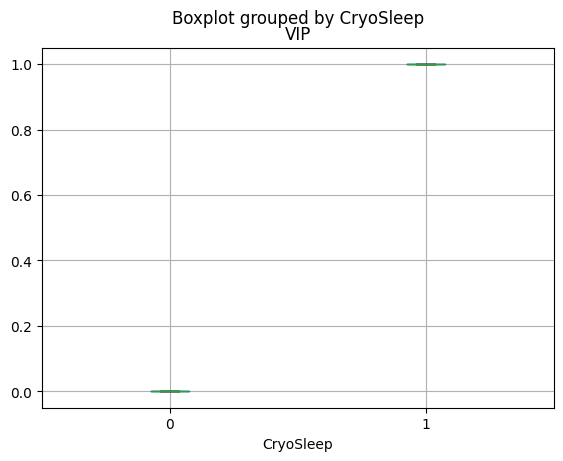

In [24]:
train_df.boxplot(column="VIP",by="CryoSleep")
plt.show()

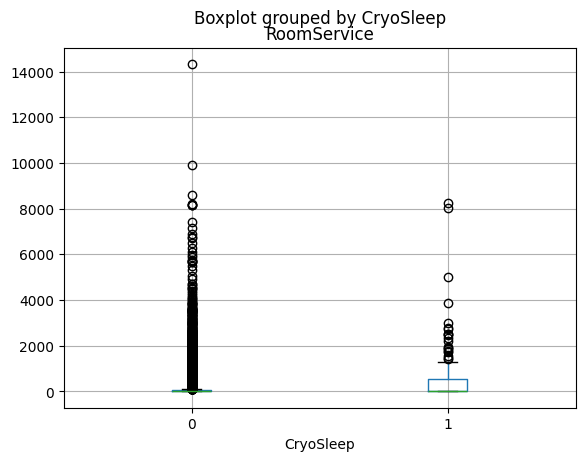

In [25]:
train_df.boxplot(column="RoomService",by="CryoSleep")
plt.show()

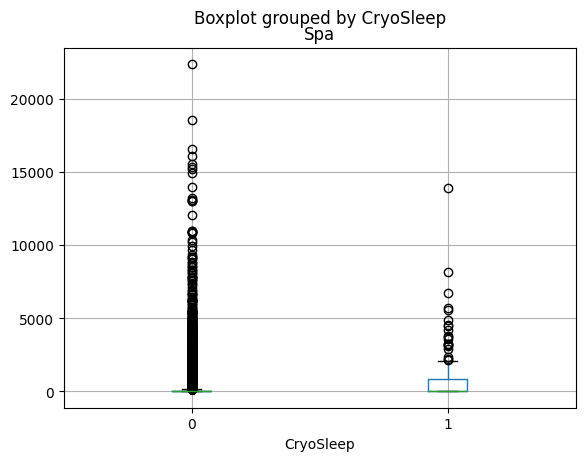

In [26]:
train_df.boxplot(column="Spa",by="CryoSleep")
plt.show()

In [27]:
train_df["MoneySpend"] = train_df["Spa"] + train_df["RoomService"] +  train_df["ShoppingMall"] + train_df["FoodCourt"] + train_df["VRDeck"]

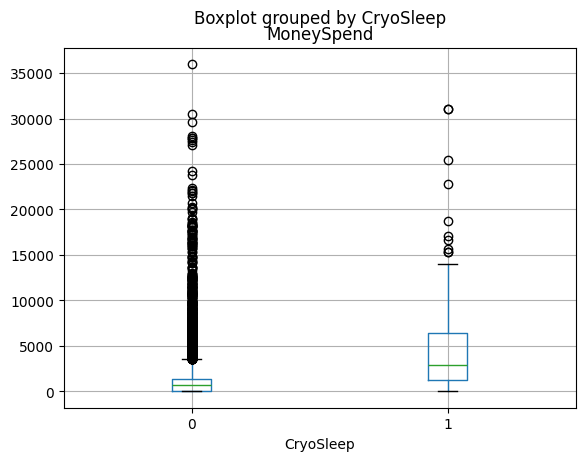

In [28]:
train_df.boxplot(column="MoneySpend",by="CryoSleep")
plt.show()

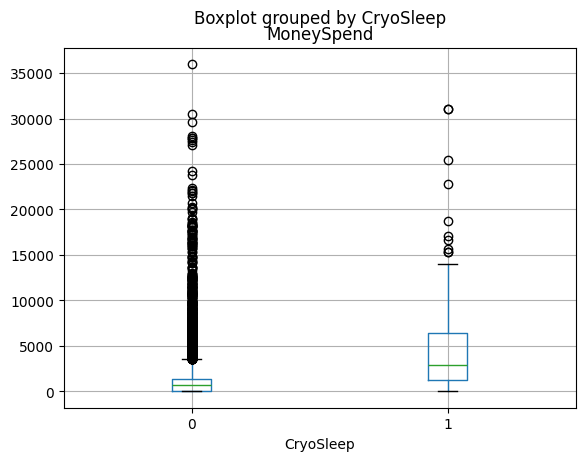

In [29]:
train_df.boxplot(column="MoneySpend",by="CryoSleep")
plt.show()

In [30]:
train_df[train_df["CryoSleep"].isnull()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,MoneySpend


In [31]:
#VIP
train_df[train_df["VIP"].isnull()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,MoneySpend


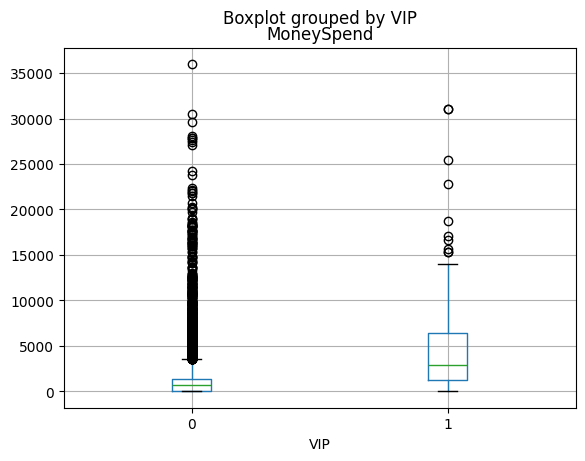

In [32]:
train_df.boxplot(column="MoneySpend",by="VIP")
plt.show()

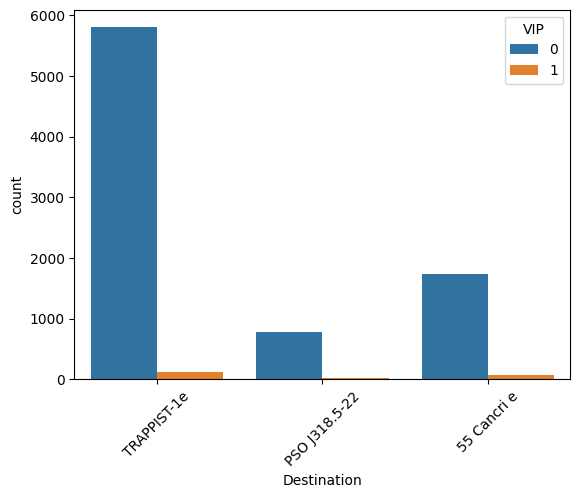

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=train_df, x="Destination", hue="VIP")
plt.xticks(rotation=45)  
plt.show()

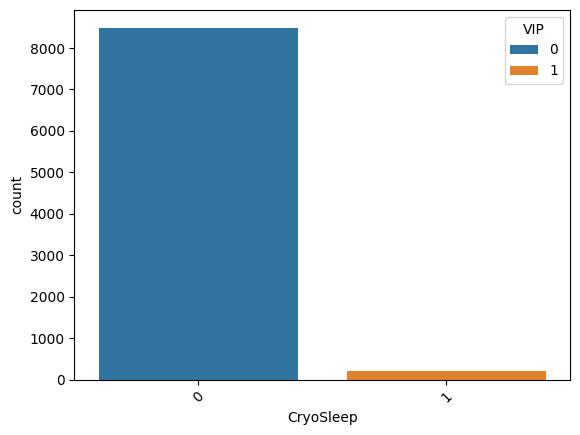

In [34]:
sns.countplot(data=train_df, x="CryoSleep", hue="VIP")
plt.xticks(rotation=45)  
plt.show()

In [35]:
for index, row in train_df[train_df["VIP"].isnull()].iterrows():
    if row["CryoSleep"] == 1:  
        train_df.at[index, "VIP"] = 1 
    else:
        train_df.at[index, "VIP"] = 0

In [36]:
train_df[train_df["VIP"].isnull()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,MoneySpend


In [37]:
# Destination
train_df[train_df["Destination"].isnull()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,MoneySpend
47,0045_02,Mars,0,F/10/P,NaN,19.0,0,0.0,0.0,0.0,0.0,0.0,Mass Chmad,1,0.0
128,0138_02,Earth,0,E/5/P,NaN,34.0,0,0.0,22.0,0.0,564.0,207.0,Monah Gambs,0,793.0
139,0152_01,Earth,0,F/32/P,NaN,41.0,0,0.0,0.0,0.0,0.0,607.0,Andan Estron,0,607.0
347,0382_01,NaN,0,G/64/P,NaN,23.0,0,348.0,0.0,0.0,4.0,368.0,Blanie Floydendley,0,720.0
430,0462_01,Earth,0,G/67/S,NaN,50.0,0,0.0,0.0,0.0,0.0,0.0,Ronia Sosanturney,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8372,8956_02,Earth,0,G/1453/P,NaN,20.0,0,0.0,0.0,0.0,0.0,0.0,Erina Bonnondry,1,0.0
8551,9130_01,Mars,0,F/1765/S,NaN,41.0,0,0.0,0.0,0.0,0.0,0.0,Blers Corte,1,0.0
8616,9195_02,Mars,0,F/1779/S,NaN,33.0,0,0.0,0.0,0.0,0.0,0.0,Ceros Purle,1,0.0
8621,9197_02,Europa,1,C/308/P,NaN,41.0,1,0.0,7964.0,0.0,3238.0,5839.0,Aludram Platch,0,17041.0


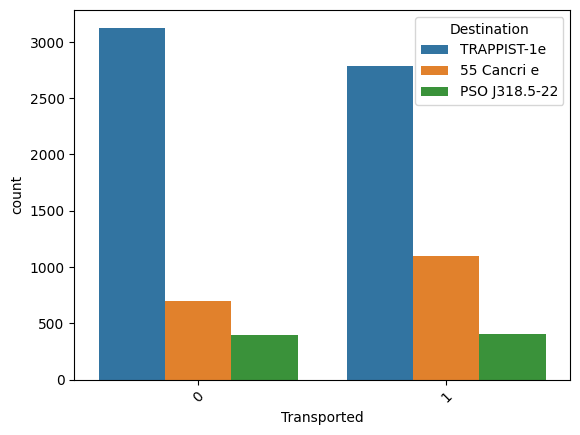

In [38]:
sns.countplot(data=train_df, x="Transported", hue="Destination")
plt.xticks(rotation=45)  
plt.show()


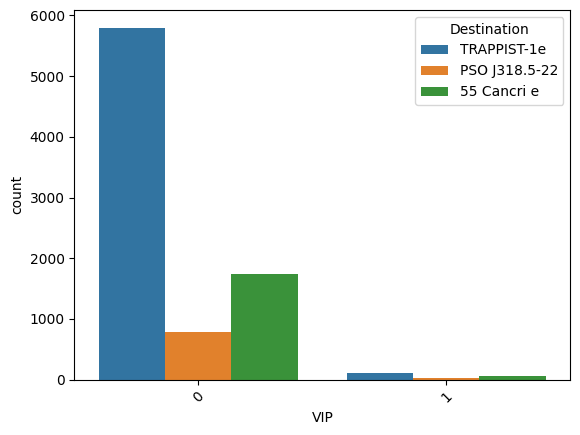

In [39]:
sns.countplot(data=train_df, x="VIP", hue="Destination")
plt.xticks(rotation=45)  
plt.show()

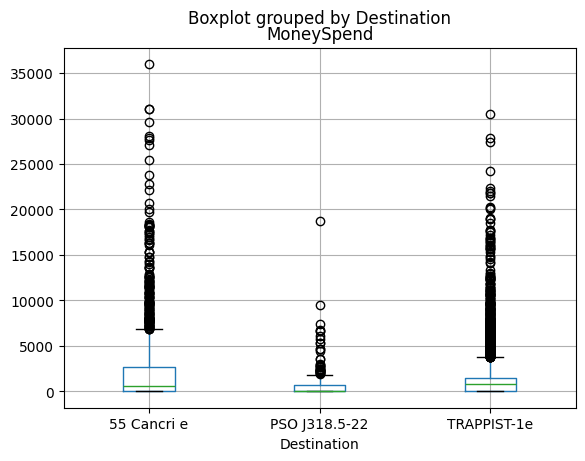

In [40]:
train_df.boxplot(column="MoneySpend",by="Destination")
plt.show()

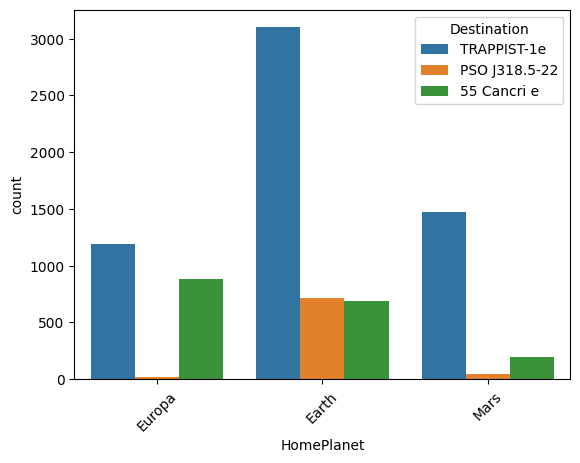

In [41]:
sns.countplot(data=train_df, x="HomePlanet", hue="Destination")
plt.xticks(rotation=45)  
plt.show()

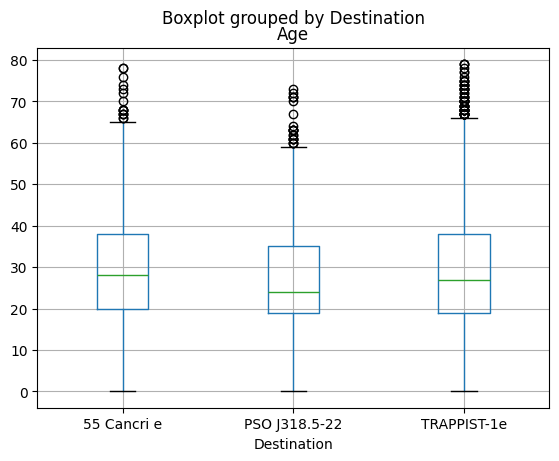

In [42]:
train_df.boxplot(column="Age",by="Destination")
plt.show()

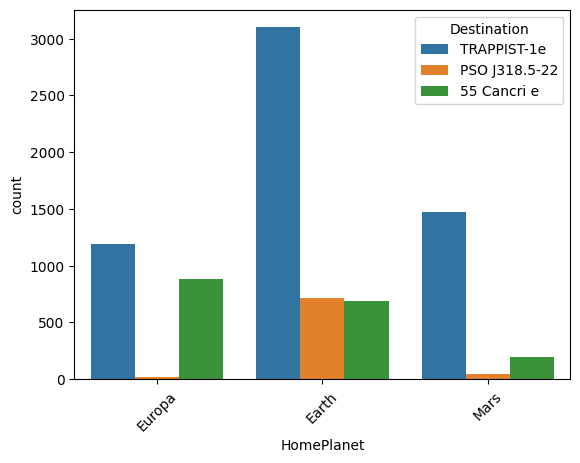

In [43]:
sns.countplot(data=train_df, x="HomePlanet", hue="Destination")
plt.xticks(rotation=45)  
plt.show()

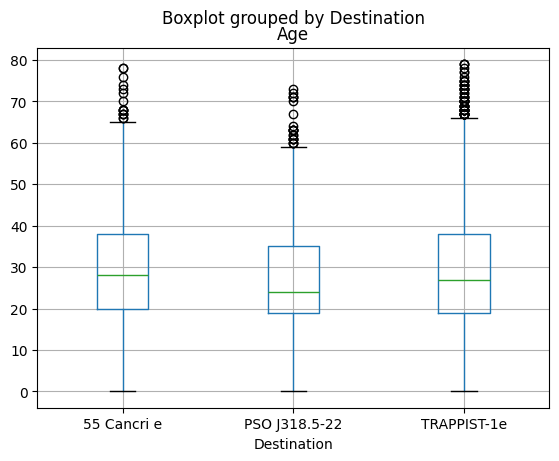

In [44]:
train_df.boxplot(column="Age",by="Destination")
plt.show()

In [45]:
train_df["Destination"] = train_df["Destination"].fillna("TRAPPIST-1e")
train_df[train_df["Destination"].isnull()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,MoneySpend


In [46]:
index_nan_roomservice = list(train_df["RoomService"][train_df["RoomService"].isnull()].index)
for i in index_nan_roomservice:
    roomservice_pred = train_df["RoomService"][((train_df["VIP"] == train_df.iloc[i]["VIP"]))].median()
    roomservice_med = train_df["RoomService"].median()
    if not np.isnan(roomservice_pred):
        train_df["RoomService"].iloc[i] = roomservice_pred
    else:
        train_df["RoomService"].iloc[i] = roomservice_med

In [47]:
train_df[train_df["RoomService"].isnull()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,MoneySpend


In [48]:
index_nan_foodcourt = list(train_df["FoodCourt"][train_df["FoodCourt"].isnull()].index)
for i in index_nan_foodcourt:
    foodcourt_pred = train_df["FoodCourt"][((train_df["VIP"] == train_df.iloc[i]["VIP"]))].median()
    foodcourt_med = train_df["FoodCourt"].median()
    if not np.isnan(foodcourt_pred):
        train_df["FoodCourt"].iloc[i] = foodcourt_pred
    else:
        train_df["FoodCourt"].iloc[i] = foodcourt_med

In [49]:
train_df[train_df["FoodCourt"].isnull()]


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,MoneySpend


In [50]:
index_nan_spa = list(train_df["Spa"][train_df["Spa"].isnull()].index)
for i in index_nan_spa:
    spa_pred = train_df["Spa"][((train_df["VIP"] == train_df.iloc[i]["VIP"]))].median()
    spa_med = train_df["Spa"].median()
    if not np.isnan(spa_pred):
        train_df["Spa"].iloc[i] = spa_pred
    else: 
        train_df["Spa"].iloc[i] = spa_med

In [51]:
train_df[train_df["Spa"].isnull()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,MoneySpend


In [52]:
index_nan_sm = list(train_df["ShoppingMall"][train_df["ShoppingMall"].isnull()].index)
for i in index_nan_sm:
    sm_pred = train_df["ShoppingMall"][((train_df["VIP"] == train_df.iloc[i]["VIP"]))].median()
    sm_med = train_df["ShoppingMall"].median()
    if not np.isnan(sm_pred):
        train_df["ShoppingMall"].iloc[i] = sm_pred
    else:
        train_df["ShoppingMall"].iloc[i] = sm_med

In [53]:
index_nan_vr = list(train_df["VRDeck"][train_df["VRDeck"].isnull()].index)
for i in index_nan_vr:
    vr_pred = train_df["VRDeck"][((train_df["VIP"] == train_df.iloc[i]["VIP"]))].median()
    vr_med = train_df["VRDeck"].median()
    if not np.isnan(vr_pred):
        train_df["VRDeck"].iloc[i] = vr_pred
    else:
        train_df["VRDeck"].iloc[i] = vr_med

In [54]:
train_df["MoneySpend"] = train_df["Spa"] + train_df["RoomService"] +  train_df["ShoppingMall"] + train_df["FoodCourt"] + train_df["VRDeck"]

In [55]:
train_df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep         0
Cabin           199
Destination       0
Age             179
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
MoneySpend        0
dtype: int64

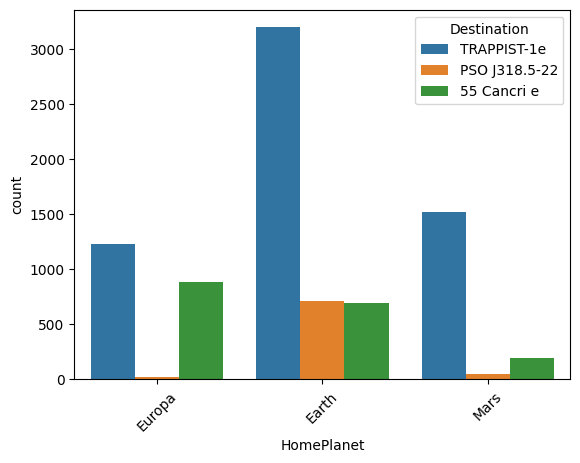

In [56]:
sns.countplot(data=train_df, x="HomePlanet", hue="Destination")
plt.xticks(rotation=45)  
plt.show()

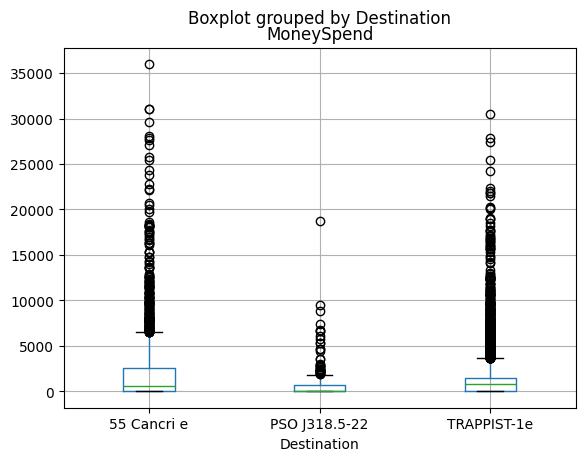

In [57]:
train_df.boxplot(column="MoneySpend",by="Destination")
plt.show()

In [58]:
for index, row in train_df[train_df["Destination"].isnull()].iterrows():
    if row["MoneySpend"] < 3000:  
        train_df.at[index, "Destination"] = "PSO J318.5-22" 
    elif row["MoneySpend"] > 3000 and row["MoneySpend"] < 7000 :
        train_df.at[index, "Destination"] = "TRAPPIST-1e"
    else:
        train_df.at[index, "Destination"] = "55 Cancri e"  

In [59]:
train_df.isnull().sum()
train_df.head

<bound method NDFrame.head of      PassengerId HomePlanet  CryoSleep     Cabin    Destination   Age  VIP  \
0        0001_01     Europa          0     B/0/P    TRAPPIST-1e  39.0    0   
1        0002_01      Earth          0     F/0/S    TRAPPIST-1e  24.0    0   
2        0003_01     Europa          1     A/0/S    TRAPPIST-1e  58.0    1   
3        0003_02     Europa          0     A/0/S    TRAPPIST-1e  33.0    0   
4        0004_01      Earth          0     F/1/S    TRAPPIST-1e  16.0    0   
...          ...        ...        ...       ...            ...   ...  ...   
8688     9276_01     Europa          1    A/98/P    55 Cancri e  41.0    1   
8689     9278_01      Earth          0  G/1499/S  PSO J318.5-22  18.0    0   
8690     9279_01      Earth          0  G/1500/S    TRAPPIST-1e  26.0    0   
8691     9280_01     Europa          0   E/608/S    55 Cancri e  32.0    0   
8692     9280_02     Europa          0   E/608/S    TRAPPIST-1e  44.0    0   

      RoomService  FoodCourt  Sho

In [60]:
RMV = ["PassengerId", "Transported"]
features = [c for c in train_df.columns if c not in RMV]
cats = [c for c in features if train_df[c].dtype == "object"]

print(f"Features: {len(features)} (Categorical: {len(cats)})")


Features: 13 (Categorical: 4)


In [61]:
train_df["Age"] = pd.to_numeric(train_df["Age"], errors="coerce")


In [62]:
train_df["CryoSleep"] = pd.to_numeric(train_df["CryoSleep"], errors="coerce")

In [63]:
train_df["VIP"] = pd.to_numeric(train_df["VIP"], errors="coerce")

In [64]:
test_df["VIP"] = pd.to_numeric(test_df["VIP"], errors="coerce")

In [65]:
test_df["MoneySpend"] = test_df["Spa"] + test_df["RoomService"] +  test_df["ShoppingMall"] + test_df["FoodCourt"] + test_df["VRDeck"]

In [66]:
test_df["CryoSleep"] = pd.to_numeric(test_df["CryoSleep"], errors="coerce")

In [67]:
import optuna                                                                                                                                                                                                                           
import logging
import numpy as np  # Importing numpy
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier

def optimize_xgboost(train_df, features, n_trials=30):
    # Check if all features exist in the dataframe
    missing_features = [feature for feature in features if feature not in train_df.columns]
    if missing_features:
        raise ValueError(f"Missing features in dataframe: {missing_features}")

    def objective(trial):
        # Define hyperparameters to optimize
        params = {
            "max_depth": trial.suggest_int("max_depth", 3, 10),
            "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
            "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
            "subsample": trial.suggest_float("subsample", 0.6, 1.0),
            "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
            "gamma": trial.suggest_float("gamma", 0.0, 5.0),
            "scale_pos_weight": trial.suggest_float("scale_pos_weight", 1.0, 3.0),
            "n_estimators": trial.suggest_int("n_estimators", 1000, 5000),
            "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 10.0),
            "reg_lambda": trial.suggest_float("reg_lambda", 0.0, 10.0),
        }

        # 5-fold cross-validation
        FOLDS = 5
        kf = KFold(n_splits=FOLDS, shuffle=True, random_state=42)
        auc_scores = []

        # Extract features and target from the dataframe
        X = train_df[features]  # Using the provided features
        y = train_df["Transported"]

        # Cross-validation loop
        for train_index, val_index in kf.split(X):
            X_train, X_val = X.iloc[train_index], X.iloc[val_index]
            y_train, y_val = y.iloc[train_index], y.iloc[val_index]

            # Initialize the model with hyperparameters
            model = XGBClassifier(
                **params,
                eval_metric="auc",
                early_stopping_rounds=650,
                random_state=42,
                tree_method="hist",
                enable_categorical=True,  # No categorical features in this dataset
                verbosity=0
            )

            # Train the model
            model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=0)

            # Predict probabilities and compute AUC
            preds = model.predict_proba(X_val)[:, 1]
            auc = roc_auc_score(y_val, preds)
            auc_scores.append(auc)

        # Return the average AUC across all folds
        return np.mean(auc_scores)

    # Set Optuna verbosity to ERROR to suppress unnecessary logs
    optuna.logging.set_verbosity(optuna.logging.ERROR)

    # Create and optimize the study
    study = optuna.create_study(direction="maximize")  # Maximize AUC
    study.optimize(objective, n_trials=n_trials)

    # Return the best hyperparameters found by Optuna
    return study.best_params

# Example features (make sure these are correct column names in train_df)
features = ['Feature1', 'Feature2', 'Feature3', 'Feature4']

# Assuming train_df is your dataset
best_params = optimize_xgboost(train_df, features, n_trials=30)
print("Best hyperparameters:", best_params)


ValueError: Missing features in dataframe: ['Feature1', 'Feature2', 'Feature3', 'Feature4']